In [1]:
import pandas as pd

#getting proper csv file
df = pd.read_csv(r'C:\Users\Yash Dhansare\Downloads\coordinates_text.txt', delimiter='\t', header=None)

#changing column names
df = df.rename(columns={0:'x',1:'y',2:'z'})

#converting all units to microns
df['x'] = df['x'].divide(1.39299)
df['y'] = df['y'].divide(1.39299)
df['z'] = df['z'].divide(1000)

df

,x,y,z
0,0.000000,0.000000,-31.872262
1,0.717880,0.000000,-31.871043
2,1.435760,0.000000,-31.866928
3,2.153641,0.000000,-31.856389
4,2.871521,0.000000,-31.833053
...,...,...,...
14676556,2746.609811,2749.481332,-40.197780
14676557,2747.327691,2749.481332,-40.235367
14676558,2748.045571,2749.481332,-40.254605
14676559,2748.763451,2749.481332,-40.264190


In [32]:
import numpy as np
import math
#	fit a sphere to X,Y, and Z data points
#	returns the radius and center points of
#	the best fit sphere
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f,rcond=None)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    return radius

spX=df['x']
spY=df['y']
spZ=df['z']
print(f"Radius of curvature of the best fit sphere: {sphereFit(spX,spY,spZ)} micrometre")




Radius of curvature of the best fit sphere: 51691.29202272084 micrometre


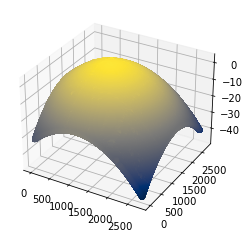

In [12]:
# importing numpy package
import numpy as np

# importing matplotlib package
import matplotlib.pyplot as plt

# importing mplot3d from
# mpl_toolkits
from mpl_toolkits import mplot3d

# creating an empty canvas
fig = plt.figure()

# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")

# creating a wide range of points x,y,z
x=arr[:,0]
y=arr[:,1]
z=arr[:,2]


# plotting a scatter plot with X-coordinate,
# Y-coordinate and Z-coordinate respectively
# and defining the points color as cividis
# and defining c as z which basically is a
# defination of 2D array in which rows are RGB
#or RGBA
ax.scatter3D(x, y, z, c=z, cmap='cividis');

# Showing the above plot
plt.show()


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

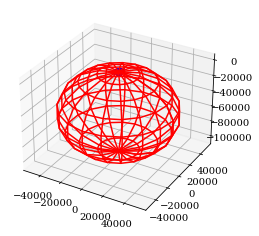

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
#   3D plot of the
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

correctX=spX
correctY=spY
correctZ=spZ

r, x0, y0, z0 = sphereFit(correctX,correctY,correctZ)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)*r
y=np.sin(u)*np.sin(v)*r
z=np.cos(v)*r
x = x + x0
y = y + y0
z = z + z0

#   3D plot of Sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(correctX, correctY, correctZ, zdir='z', s=20, c='b',rasterized=True)
ax.plot_wireframe(x, y, z, color="r")
ax.set_aspect('equal')
ax.set_xlim3d(-35, 35)
ax.set_ylim3d(-35,35)
ax.set_zlim3d(-70,0)
ax.set_xlabel('$x$ (mm)',fontsize=16)
ax.set_ylabel('\n$y$ (mm)',fontsize=16)
zlabel = ax.set_zlabel('\n$z$ (mm)',fontsize=16)
plt.show()
plt.savefig('steelBallFitted.pdf', format='pdf', dpi=300, bbox_extra_artists=[zlabel], bbox_inches='tight')

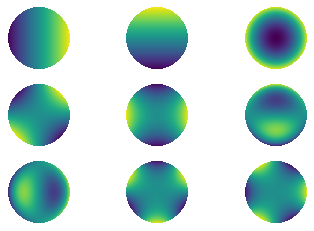

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from zernike import RZern

cart = RZern(6)
L, K = 200, 250
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)

c = np.zeros(cart.nk)
plt.figure(1)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    c *= 0.0
    c[i] = 1.0
    Phi = cart.eval_grid(c, matrix=True)
    plt.imshow(Phi, origin='lower', extent=(-1, 1, -1, 1))
    plt.axis('off')

plt.show()

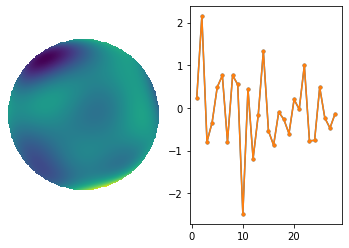

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from zernike import RZern

cart = RZern(6)
L, K = 200, 250
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)

c0 = np.random.normal(size=cart.nk)
Phi = cart.eval_grid(c0, matrix=True)
c1 = cart.fit_cart_grid(Phi)[0]
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(Phi, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.plot(range(1, cart.nk + 1), c0, marker='.')
plt.plot(range(1, cart.nk + 1), c1, marker='.')

plt.show()